# Random Forrest Regressor 

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import nextbike.preprocessing.Preprocessing as prep

from scipy.stats import zscore
import numpy as np
from vincenty import vincenty 
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
from sklearn.linear_model import Lasso,Ridge, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.svm import SVR
import time 

In [2]:
model ,r2, rmse, mae, exetime, desc = [],[],[],[],[],[] # arrays for results

In [32]:
# read in trip data
df = pd.read_csv('../data/processed/dortmund_trips.csv', index_col=0)

In [5]:
# best features so far 
X = df[["month","weekday","day","hour","minute","latitude_start","longitude_start",
        "area_start","temperature °C","precipitation", "distanceToUniversity","distaneToCentralStation"]]

y = df["trip_duration"]
#y = df["ln_duration"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42) #split data / cross validation


In [6]:
#first try rfr
start = time.time()  # to measure execution time

# scaling the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

scaler.fit(X_test)
X_test_scaled = scaler.transform(X_test)

# fitting a random forrest regressor
rfr = RandomForestRegressor()
rfr.fit(X_train_scaled,y_train)
pred = rfr.predict(X_test_scaled)
pred_train = rfr.predict(X_train_scaled)

end = time.time()
executionTime = (end-start)/60

print("w/o cross-validation:")
print("R^2-Score is: {}".format(rfr.score(X_train_scaled,y_train)))
print("RMSE: {}".format(np.sqrt(mean_squared_error(y_train,pred_train))))
print("MAE: {}".format(mean_absolute_error(y_train,pred_train)))
print("")
print("w/ cross-validation")
print("R2-Score is: {}".format(rfr.score(X_test_scaled,y_test)))
print("RMSE: {}".format(np.sqrt(mean_squared_error(y_test,pred))))
print("MAE: {}".format(mean_absolute_error(y_test,pred)))

w/o cross-validation:
R^2-Score is: 0.8660337575560646
RMSE: 30.575366892124535
MAE: 12.520287107702405

w/ cross-validation
R2-Score is: 0.14095710177717402
RMSE: 77.04644464429589
MAE: 33.1034619385592


--> Model is overfitted, due to the much better metrics for training data than for the test data 

In [7]:
# add scores to score arrays 
model.append("RF")
r2.append(rfr.score(X_test_scaled,y_test))
rmse.append(np.sqrt(mean_squared_error(y_test,pred)))
mae.append(mean_absolute_error(y_test,pred))
exetime.append(executionTime) # save execution time from the cell above 
desc.append("first try rfr, overfitted ") # describe the model above 

In [8]:
# avoid overfitting - reduce complexity of the model 
start = time.time() # to measure execution time

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

scaler.fit(X_test)
X_test_scaled = scaler.transform(X_test)

# set hyperparamters that decrease the complexity of the random forrest
rfr = RandomForestRegressor(n_estimators=50, max_depth=12, min_samples_split=2, min_samples_leaf=15)
rfr.fit(X_train_scaled,y_train)
pred = rfr.predict(X_test_scaled)
pred_train = rfr.predict(X_train_scaled)

end = time.time()
executionTime = (end-start)/60

print("w/o cross-validation:")
print("R^2-Score is: {}".format(rfr.score(X_train_scaled,y_train)))
print("RMSE: {}".format(np.sqrt(mean_squared_error(y_train,pred_train))))
print("MAE: {}".format(mean_absolute_error(y_train,pred_train)))
print("")
print("w/ cross-validation")
print("R2-Score is: {}".format(rfr.score(X_test_scaled,y_test)))
print("RMSE: {}".format(np.sqrt(mean_squared_error(y_test,pred))))
print("MAE: {}".format(mean_absolute_error(y_test,pred)))

w/o cross-validation:
R^2-Score is: 0.2562319738218357
RMSE: 72.04315791246765
MAE: 31.80285944489945

w/ cross-validation
R2-Score is: 0.17632322803176403
RMSE: 75.4438054118008
MAE: 33.456217729851645


In [9]:
# add scores to score arrays 
model.append("RF")
r2.append(rfr.score(X_test_scaled,y_test))
rmse.append(np.sqrt(mean_squared_error(y_test,pred)))
mae.append(mean_absolute_error(y_test,pred))
exetime.append(executionTime)
desc.append("adjust hyperparameters to avoid overfitting")

In [10]:
start = time.time() # to measure execution time

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

scaler.fit(X_test)
X_test_scaled = scaler.transform(X_test)

# parameter tuning done with RandomizedSearchCV (see in the notebook with RandomizedSearches)
rfr = RandomForestRegressor(max_features="auto",n_estimators=1155, max_depth=70, min_samples_split=10, min_samples_leaf=8,bootstrap=True)
rfr.fit(X_train_scaled,y_train)
pred = rfr.predict(X_test_scaled)
pred_train = rfr.predict(X_train_scaled)

end = time.time()
executionTime = (end-start)/60

print("w/o cross-validation:")
print("R^2-Score is: {}".format(rfr.score(X_train_scaled,y_train)))
print("RMSE: {}".format(np.sqrt(mean_squared_error(y_train,pred_train))))
print("MAE: {}".format(mean_absolute_error(y_train,pred_train)))
print("")
print("w/ cross-validation")
print("R2-Score is: {}".format(rfr.score(X_test_scaled,y_test)))
print("RMSE: {}".format(np.sqrt(mean_squared_error(y_test,pred))))
print("MAE: {}".format(mean_absolute_error(y_test,pred)))

w/o cross-validation:
R^2-Score is: 0.43241584247687403
RMSE: 62.93454858155161
MAE: 26.321411873168756

w/ cross-validation
R2-Score is: 0.2000195301476706
RMSE: 74.35066702806822
MAE: 32.003230524793835


In [11]:
# add scores to score arrays 
model.append("RF")
r2.append(rfr.score(X_test_scaled,y_test))
rmse.append(np.sqrt(mean_squared_error(y_test,pred)))
mae.append(mean_absolute_error(y_test,pred))
exetime.append(executionTime)
desc.append("hyperparameters with RandomizedSearch adjusted ")

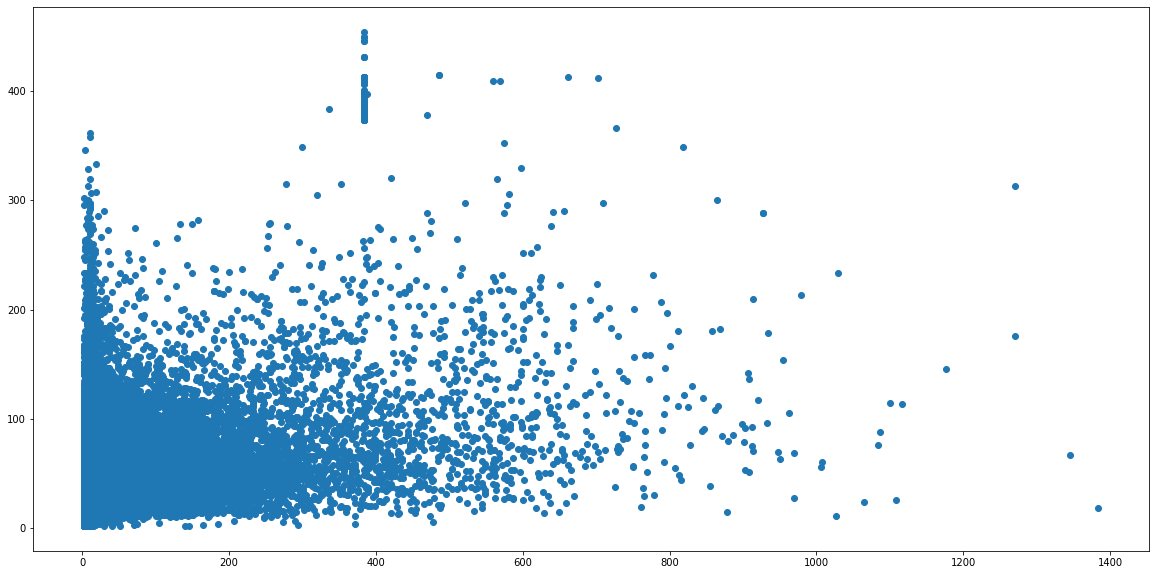

In [12]:
# shows the predictions vs. the actual values 
plt.figure(figsize=(20,10))
plt.scatter(y_test,pred)

## Using log of trip duration 

In [21]:
df["log_duration"] = df["trip_duration"].transform(np.log)

In [22]:
X = df[["month","weekday","day","hour","minute","latitude_start","longitude_start",
        "area_start","temperature °C","precipitation", "distanceToUniversity","distaneToCentralStation"]]
y = df["log_duration"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [23]:
start = time.time()

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

scaler.fit(X_test)
X_test_scaled = scaler.transform(X_test)

rfr = RandomForestRegressor(max_features="auto",n_estimators=1155, max_depth=70, min_samples_split=10, min_samples_leaf=8,bootstrap=True)
rfr.fit(X_train_scaled,y_train)
pred = rfr.predict(X_test_scaled)
pred_train = rfr.predict(X_train_scaled)

end = time.time()
executionTime = (end-start)/60

print("w/o cross-validation:")
print("R^2-Score is: {}".format(rfr.score(X_train_scaled,y_train)))
print("RMSE: {}".format(np.sqrt(mean_squared_error(y_train,pred_train))))
print("MAE: {}".format(mean_absolute_error(y_train,pred_train)))
print("")
print("w/ cross-validation")
print("R2-Score is: {}".format(rfr.score(X_test_scaled,y_test)))
print("RMSE: {}".format(np.sqrt(mean_squared_error(y_test,pred))))
print("MAE: {}".format(mean_absolute_error(y_test,pred)))

w/o cross-validation:
R^2-Score is: 0.6718690627634276
RMSE: 0.772626530569338
MAE: 0.5025647334816494

w/ cross-validation
R2-Score is: 0.4978773442317942
RMSE: 0.9575580354349695
MAE: 0.6304310173147305


In [24]:
# exp the predictions to get correct values 
# compare this with actual values 
y_train = np.exp(y_train)
pred_train = np.exp(pred_train)

y_test = np.exp(y_test)
pred = np.exp(pred)

print("w/o cross-validation:")
print("RMSE: {}".format(np.sqrt(mean_squared_error(y_train,pred_train))))
print("MAE: {}".format(mean_absolute_error(y_train,pred_train)))
print("")
print("w/ cross-validation")
print("RMSE: {}".format(np.sqrt(mean_squared_error(y_test,pred))))
print("MAE: {}".format(mean_absolute_error(y_test,pred)))

w/o cross-validation:
RMSE: 76.28711667292232
MAE: 22.675357922524796

w/ cross-validation
RMSE: 79.95200166624161
MAE: 25.575316171445827


In [25]:
# add scores to score arrays 
model.append("RF")
r2.append("-")
rmse.append(np.sqrt(mean_squared_error(y_test,pred)))
mae.append(mean_absolute_error(y_test,pred))
exetime.append(executionTime)
desc.append("using log of trip duration/ exp after prediction")

--> MAE decreases from around 33 to 26 if the log of trip durations is used to fit the random forrest

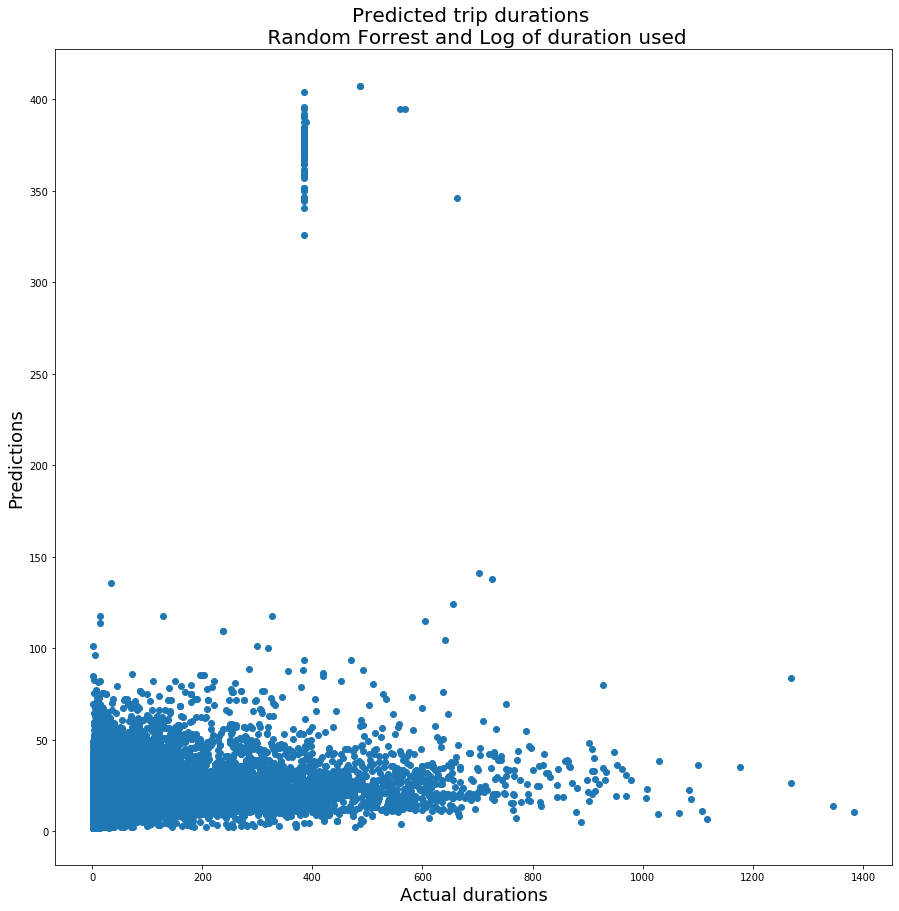

In [18]:
f, axs = plt.subplots(1,1,figsize=(15,15))
plt.scatter(y_test,pred)
plt.ylabel("Predictions",fontsize=18)
plt.xlabel("Actual durations", fontsize=18)
plt.title("Predicted trip durations \n Random Forrest and log of duration used", fontsize=20)
plt.show()

In [26]:
results = {
    "Model" : model, 
    "R^2" : r2, 
    "RMSE": rmse, 
    "MAE": mae, 
    "Execution time in minutes":exetime, 
    "Description":desc
}

In [27]:
# summary of results 
df_results = pd.DataFrame(results)
df_results

,Model,R^2,RMSE,MAE,Execution time in minutes,Description
0,RF,0.140957,77.046445,33.103462,1.494382,"first try rfr, overfitted"
1,RF,0.176323,75.443805,33.456218,0.415689,adjust hyperparameters to avoid overfitting
2,RF,0.20002,74.350667,32.003231,13.078619,hyperparameters with RandomizedSearch adjusted
3,RF,-,81.119785,26.244243,0.412784,using log of trip duration/ exp after prediction
4,RF,-,79.952002,25.575316,13.162461,using log of trip duration/ exp after prediction
